<a href="https://colab.research.google.com/github/raviintechis/Pluralsight_project/blob/main/Pluralsight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Libraries
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [3]:
#Loading the dataset
ss = pd.read_excel('/content/PAE_Home-Assignment_Data.xlsx')
ss.head()

,acct_id,visit_num,visit_dt,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,b2b_visit_indicator,page_views,searches
0,1261,1,2018-03-12,18,2373,2563,173376,1,0,6,5
1,1261,2,2018-03-13,15,2453,2765,115584,1,0,1,5
2,1261,3,2018-03-14,22,3296,4627,86688,1,0,2,5
3,1261,4,2018-03-15,45,6337,7121,173376,1,0,2,3
4,1261,5,2018-03-16,27,4393,4968,260064,1,0,4,0


In [4]:
ss.columns

Index(['acct_id', 'visit_num', 'visit_dt', 'clip_views', 'view_time_sec',
       'total_clip_length_sec', 'total_course_lngth_sec', 'courses_viewed',
       'b2b_visit_indicator', 'page_views', 'searches'],
      dtype='object')

In [5]:
ss.shape

(13644, 11)

In [6]:
ss.describe()

,acct_id,visit_num,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,b2b_visit_indicator,page_views,searches
count,13644.000000,13644.000000,13644.000000,13644.000000,13644.000000,1.364400e+04,13644.000000,13644.000000,13644.000000,13644.000000
mean,1716.179420,21.128042,21.432498,4026.209469,5324.848798,2.505053e+05,1.483949,0.516931,4.298373,1.888156
std,286.854475,23.935015,24.241938,3848.833272,5976.236783,4.109100e+05,1.103707,0.499732,3.178949,2.442407
min,1200.000000,1.000000,1.000000,12.000000,12.000000,1.000000e+03,1.000000,0.000000,1.000000,0.000000
25%,1456.000000,5.000000,6.000000,1205.000000,1519.000000,4.450775e+04,1.000000,0.000000,2.000000,0.000000
50%,1716.000000,12.000000,15.000000,2974.500000,3819.000000,1.228560e+05,1.000000,1.000000,3.000000,1.000000
75%,1971.000000,29.000000,31.000000,5702.250000,7390.500000,2.955072e+05,2.000000,1.000000,6.000000,3.000000
max,2200.000000,153.000000,910.000000,40086.000000,208513.000000,1.206972e+07,22.000000,1.000000,19.000000,14.000000


In [7]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13644 entries, 0 to 13643
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   acct_id                 13644 non-null  int64         
 1   visit_num               13644 non-null  int64         
 2   visit_dt                13644 non-null  datetime64[ns]
 3   clip_views              13644 non-null  int64         
 4   view_time_sec           13644 non-null  int64         
 5   total_clip_length_sec   13644 non-null  int64         
 6   total_course_lngth_sec  13644 non-null  int64         
 7   courses_viewed          13644 non-null  int64         
 8   b2b_visit_indicator     13644 non-null  int64         
 9   page_views              13644 non-null  int64         
 10  searches                13644 non-null  int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 1.1 MB


In [8]:
# count the number of NaN values in each column
print(ss.isnull().sum())

acct_id                   0
visit_num                 0
visit_dt                  0
clip_views                0
view_time_sec             0
total_clip_length_sec     0
total_course_lngth_sec    0
courses_viewed            0
b2b_visit_indicator       0
page_views                0
searches                  0
dtype: int64


In [11]:
def parse_date_time(df):
    
    visit_dt_col_name = 'visit_dt'
    
    from datetime import datetime
    df[visit_dt_col_name]=pd.to_datetime(df[visit_dt_col_name] )
    df['Month']=pd.DatetimeIndex(df[visit_dt_col_name]).month
    df['Year']=pd.DatetimeIndex(df[visit_dt_col_name]).year
    df['Day']=pd.DatetimeIndex(df[visit_dt_col_name]).day
    df.drop(visit_dt_col_name,axis=1,inplace=True)

In [12]:
parse_date_time(ss)
ss.head()

,acct_id,visit_num,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,b2b_visit_indicator,page_views,searches,Month,Year,Day
0,1261,1,18,2373,2563,173376,1,0,6,5,3,2018,12
1,1261,2,15,2453,2765,115584,1,0,1,5,3,2018,13
2,1261,3,22,3296,4627,86688,1,0,2,5,3,2018,14
3,1261,4,45,6337,7121,173376,1,0,2,3,3,2018,15
4,1261,5,27,4393,4968,260064,1,0,4,0,3,2018,16


In [18]:
ss.courses_viewed.unique()

array([ 1,  2,  3,  5,  7,  4,  6, 13,  9,  8, 11, 10, 18, 12, 15, 20, 22,
       19])

In [19]:
ss.b2b_visit_indicator.unique()

array([0, 1])

In [13]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13644 entries, 0 to 13643
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   acct_id                 13644 non-null  int64
 1   visit_num               13644 non-null  int64
 2   clip_views              13644 non-null  int64
 3   view_time_sec           13644 non-null  int64
 4   total_clip_length_sec   13644 non-null  int64
 5   total_course_lngth_sec  13644 non-null  int64
 6   courses_viewed          13644 non-null  int64
 7   b2b_visit_indicator     13644 non-null  int64
 8   page_views              13644 non-null  int64
 9   searches                13644 non-null  int64
 10  Month                   13644 non-null  int64
 11  Year                    13644 non-null  int64
 12  Day                     13644 non-null  int64
dtypes: int64(13)
memory usage: 1.4 MB


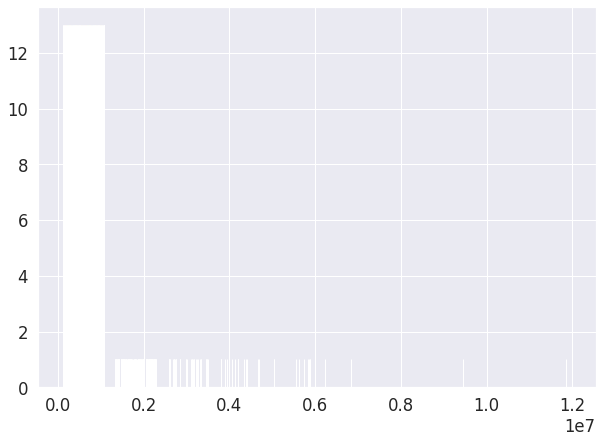

In [14]:
# histogram plot
fig = plt.figure(figsize=(10,7))
plt.hist(ss);

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


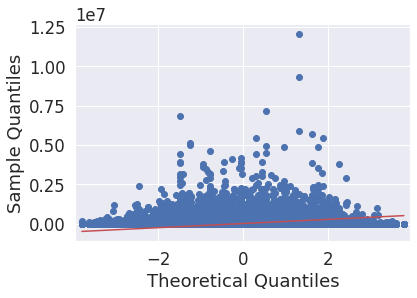

In [15]:
# q-q plot
from statsmodels.graphics.gofplots import qqplot
qqplot(ss, line='s');

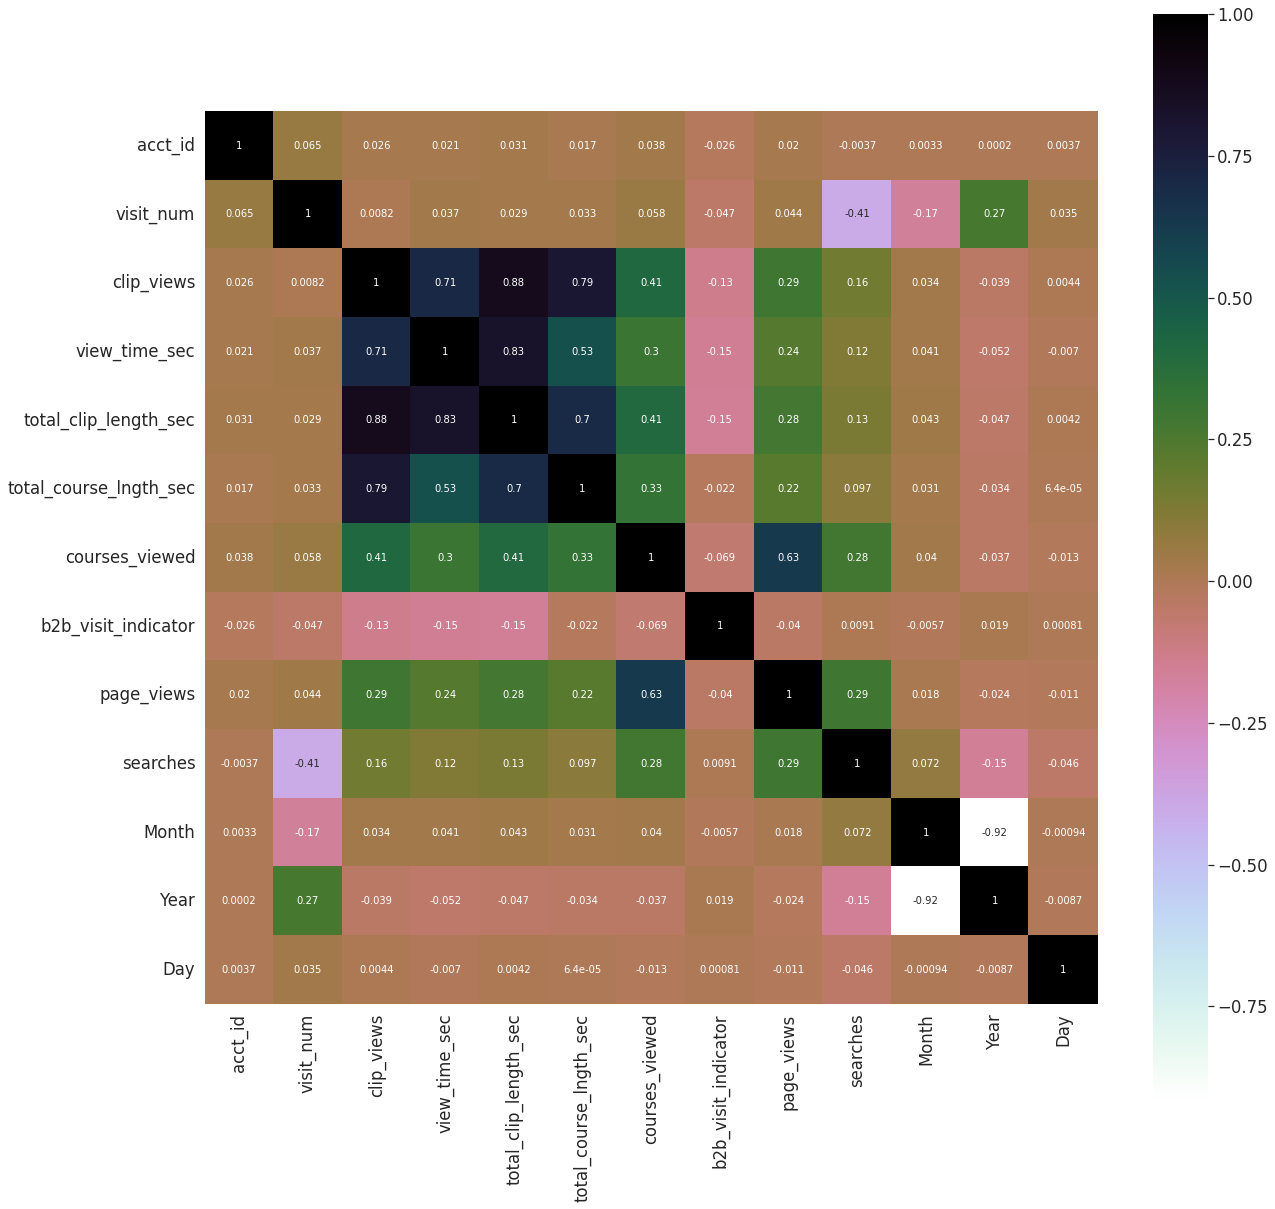

In [23]:
corr=ss.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)

In [24]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

import matplotlib
from matplotlib import pyplot
%matplotlib inline


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
X=ss.drop(['b2b_visit_indicator'],axis=1)
y=ss['b2b_visit_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test=sc.transform(X_test)

In [ ]:
# ZX = preprocessing.scale(X)
# ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.2, random_state=10)

In [26]:
model=LogisticRegression(verbose=1)
model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [27]:
#Test the model
predictions = model.predict(X_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print(classification_report(y_test, predictions))

[0 1 1 ... 1 0 0]

              precision    recall  f1-score   support

           0       0.61      0.42      0.50      1318
           1       0.58      0.75      0.65      1411

    accuracy                           0.59      2729
   macro avg       0.60      0.59      0.58      2729
weighted avg       0.60      0.59      0.58      2729



Accuracy = 0.59
Recall = 0.75



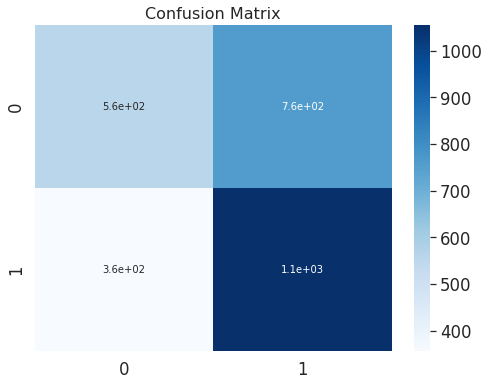

In [28]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
print(f'Accuracy = {accuracy_score(y_test, predictions):.2f}\nRecall = {recall_score(y_test, predictions):.2f}\n')
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [29]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [31]:
#Random Forest
clf = RandomForestClassifier()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.5940340076223981


In [32]:
#KNN
clf = KNeighborsClassifier()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.5591468777484608


In [38]:
#Random Forest
clf = RandomForestClassifier()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.5919818235121665


In [39]:
#SVM
from sklearn.svm import SVC,SVR
clf = SVC(gamma='scale')
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.5232336558194078


In [40]:
pip install keras

In [41]:
pip install tensorflow

## HPO Algorithm 2: Random Search

Randomly search hyper-parameter combinations in the search space

Advantages:

More efficient than GS.
Enable parallelization.
Disadvantages:

Not consider previous results.
Not efficient with conditional HPs.

In [42]:
#KNN
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'n_neighbors': range(1,20),
}
n_iter_search=10
clf = KNeighborsClassifier()
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(X, y)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))

{'n_neighbors': 19}
Accuracy:0.5690413368513633


In [47]:
import xgboost
from xgboost import XGBRegressor
# from sklearn.ensemble import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
scaler = MinMaxScaler()
model = XGBRegressor(objective ='reg:squarederror',
                     n_estimators=1000, max_depth=3, eta=0.1, subsample=0.7, colsample_bytree=0.8, random_state = 42)
imputer = KNNImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(X_train, y_train)
pipe.predict(X_test)
pipe.score(X_test, y_test)

0.6995795521216184

[0.21722475 0.09320541 0.14010195 0.05806934 0.09745244 0.09790747
 0.05351836 0.03915504 0.05250949 0.06605229 0.04452669 0.04027684]


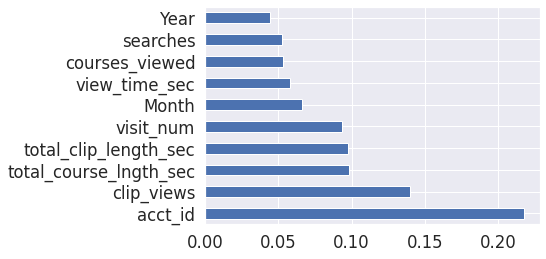

In [48]:
print(model.feature_importances_) 


#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()